# Analysis of covariates in linear and open environments

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('plot_style.mplstyle')

import yaml
import numpy as np
np.random.seed(42)
import pingouin as pg
import pandas as pd
import h5py
import os
from functions.signal_processing import smooth_1D
from tqdm import tqdm

# Params
with open('params.yaml','r') as file:
    params = yaml.full_load(file)

In [2]:
sessionList=os.listdir(os.path.join(params['path_to_results'],'covariates'))
OF_covariates_data = np.zeros((0,5,5))
LT_covariates_data = np.zeros((0,5,5))
labels=['space','time','distance','speed','heading']

for session in tqdm(sessionList):
    if os.path.exists(os.path.join(params['path_to_results'],'covariates',session,'info.yaml')): # TODO: Report any file missing
        info_file=open(os.path.join(params['path_to_results'],'covariates',session,'info.yaml'),'r')
        session_info = yaml.full_load(info_file)
        
        covariate_file = h5py.File(os.path.join(params['path_to_results'],'covariates',session,'covariates.h5'), 'r')
        if session_info['task']=='OF' or session_info['task']=='OF' or session_info['task']=='plexiOF':
            OF_covariates_data = np.concatenate((OF_covariates_data,[covariate_file['AMI']]),axis=0)

        if session_info['task']=='LT' or session_info['task']=='legoLT' or session_info['task']=='legoToneLT' or session_info['task']=='legoSeqLT':
            LT_covariates_data = np.concatenate((LT_covariates_data,[covariate_file['AMI']]),axis=0)
        
        # Close files
        info_file.close()
        covariate_file.close()

100%|██████████| 256/256 [00:00<00:00, 809.15it/s]


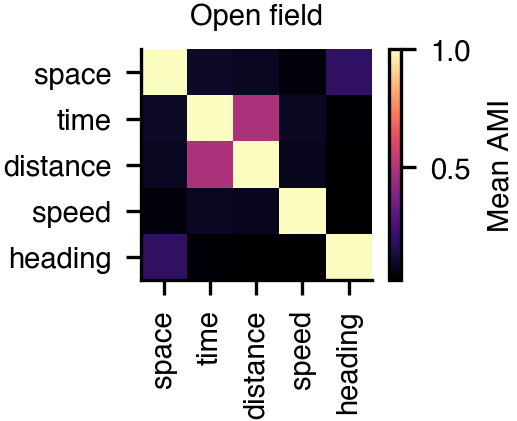

In [65]:
plt.imshow(np.mean(OF_covariates_data,axis=0),cmap='magma')
plt.title('Open field')
plt.xticks(np.arange(5),labels,rotation=90)
plt.yticks(np.arange(5),labels)
plt.colorbar(label='Mean AMI')
plt.savefig(params['path_to_results']+'/figures'+'/mean_covarianceMX_OF.pdf')

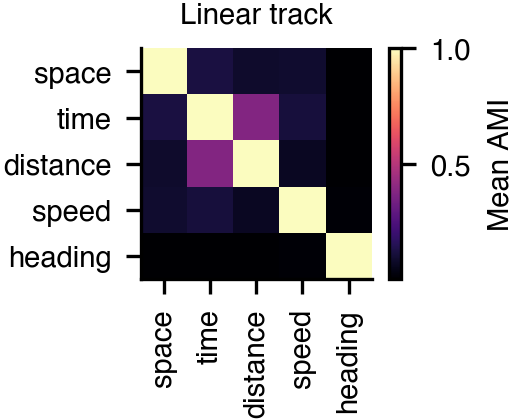

In [66]:
plt.imshow(np.mean(LT_covariates_data,axis=0),cmap='magma')
plt.title('Linear track')
plt.xticks(np.arange(5),labels,rotation=90)
plt.yticks(np.arange(5),labels)
plt.colorbar(label='Mean AMI')
plt.savefig(params['path_to_results']+'/figures'+'/mean_covarianceMX_LT.pdf')

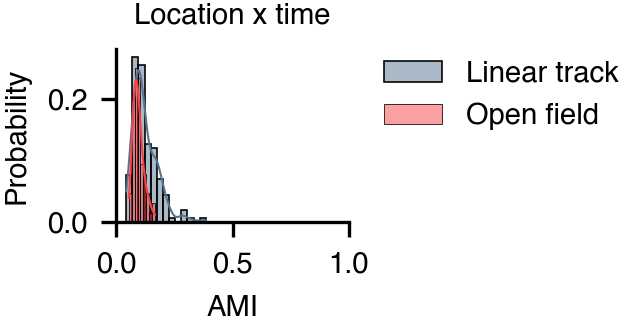

In [92]:
plt.figure(figsize=(1,.75))
sns.histplot(x=LT_covariates_data[:,0,1],kde=True,
             label='Linear track',
             stat='probability',
             color='C0',
             )
sns.histplot(x=OF_covariates_data[:,0,1],kde=True,
             label='Open field',
             stat='probability',
             color='C6')

plt.title('Location x time')
plt.xlabel('AMI')
plt.xlim([0,1])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(params['path_to_results']+'/figures'+'/covariance_locationVStime.pdf')

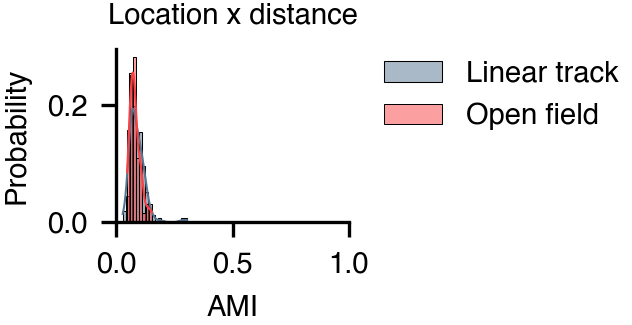

In [93]:
plt.figure(figsize=(1,.75))
sns.histplot(x=LT_covariates_data[:,0,2],kde=True,
             label='Linear track',
             stat='probability',
             color='C0'
             )
sns.histplot(x=OF_covariates_data[:,0,2],kde=True,
             label='Open field',
             stat='probability',
             color='C6')

plt.title('Location x distance')
plt.xlabel('AMI')
plt.xlim([0,1])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(params['path_to_results']+'/figures'+'/covariance_locationVSdistance.pdf')

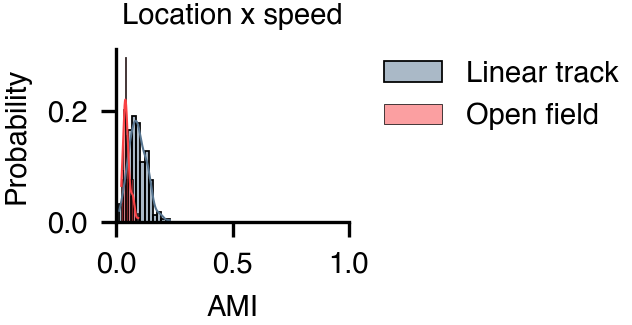

In [94]:
plt.figure(figsize=(1,.75))
sns.histplot(x=LT_covariates_data[:,0,3],kde=True,
             label='Linear track',
             stat='probability',
             color='C0'
             )
sns.histplot(x=OF_covariates_data[:,0,3],kde=True,
             label='Open field',
             stat='probability',
             color='C6')

plt.title('Location x speed')
plt.xlabel('AMI')
plt.xlim([0,1])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(params['path_to_results']+'/figures'+'/covariance_locationVSspeed.pdf')

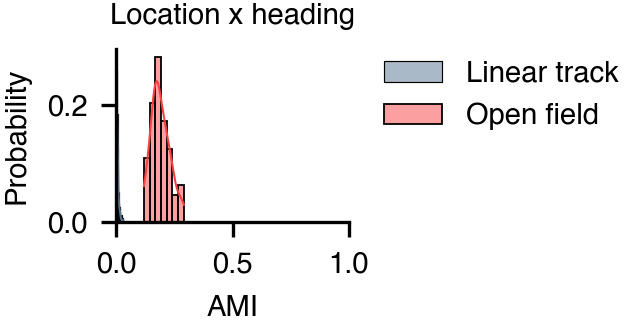

In [95]:
plt.figure(figsize=(1,.75))
sns.histplot(x=LT_covariates_data[:,0,4],kde=True,
             label='Linear track',
             stat='probability',
             color='C0'
             )
sns.histplot(x=OF_covariates_data[:,0,4],kde=True,
             label='Open field',
             stat='probability',
             color='C6')

plt.title('Location x heading')
plt.xlabel('AMI')
plt.xlim([0,1])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(params['path_to_results']+'/figures'+'/covariance_locationVSheading.pdf')

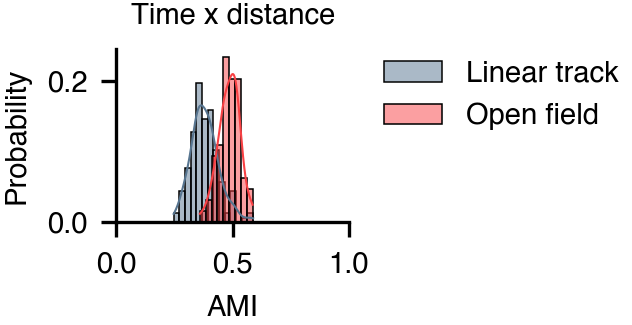

In [98]:
plt.figure(figsize=(1,.75))
sns.histplot(x=LT_covariates_data[:,1,2],kde=True,
             label='Linear track',
             stat='probability',
             color='C0'
             )
sns.histplot(x=OF_covariates_data[:,1,2],kde=True,
             label='Open field',
             stat='probability',
             color='C6')

plt.title('Time x distance')
plt.xlabel('AMI')
plt.xlim([0,1])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(params['path_to_results']+'/figures'+'/covariance_timeVSdistance.pdf')

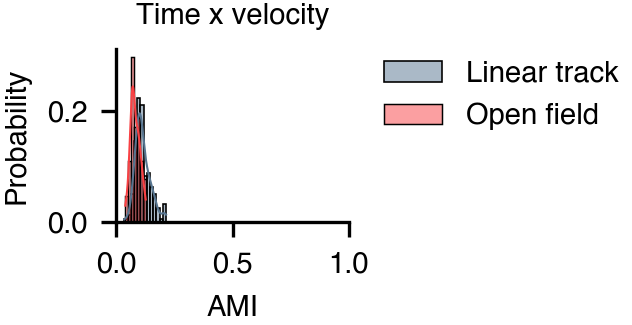

In [99]:
plt.figure(figsize=(1,.75))
sns.histplot(x=LT_covariates_data[:,1,3],kde=True,
             label='Linear track',
             stat='probability',
             color='C0'
             )
sns.histplot(x=OF_covariates_data[:,1,3],kde=True,
             label='Open field',
             stat='probability',
             color='C6')

plt.title('Time x velocity')
plt.xlabel('AMI')
plt.xlim([0,1])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(params['path_to_results']+'/figures'+'/covariance_timeVSvelocity.pdf')

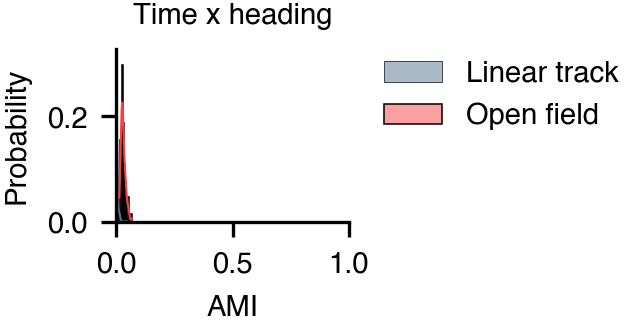

In [100]:
plt.figure(figsize=(1,.75))
sns.histplot(x=LT_covariates_data[:,1,4],kde=True,
             label='Linear track',
             stat='probability',
             color='C0'
             )
sns.histplot(x=OF_covariates_data[:,1,4],kde=True,
             label='Open field',
             stat='probability',
             color='C6')

plt.title('Time x heading')
plt.xlabel('AMI')
plt.xlim([0,1])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(params['path_to_results']+'/figures'+'/covariance_timeVSheading.pdf')

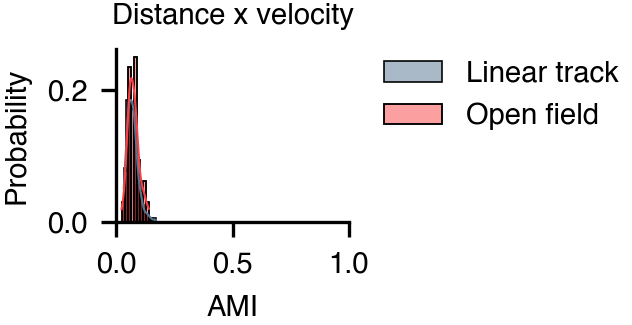

In [104]:
plt.figure(figsize=(1,.75))
sns.histplot(x=LT_covariates_data[:,2,3],kde=True,
             label='Linear track',
             stat='probability',
             color='C0'
             )
sns.histplot(x=OF_covariates_data[:,2,3],kde=True,
             label='Open field',
             stat='probability',
             color='C6')

plt.title('Distance x velocity')
plt.xlabel('AMI')
plt.xlim([0,1])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(params['path_to_results']+'/figures'+'/covariance_distanceVSvelocity.pdf')

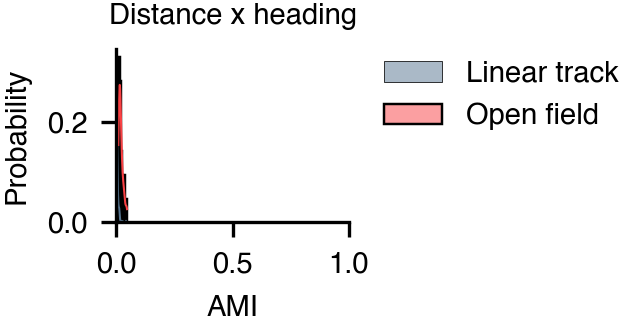

In [102]:
plt.figure(figsize=(1,.75))
sns.histplot(x=LT_covariates_data[:,2,4],kde=True,
             label='Linear track',
             stat='probability',
             color='C0'
             )
sns.histplot(x=OF_covariates_data[:,2,4],kde=True,
             label='Open field',
             stat='probability',
             color='C6')

plt.title('Distance x heading')
plt.xlabel('AMI')
plt.xlim([0,1])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(params['path_to_results']+'/figures'+'/covariance_distanceVSheading.pdf')

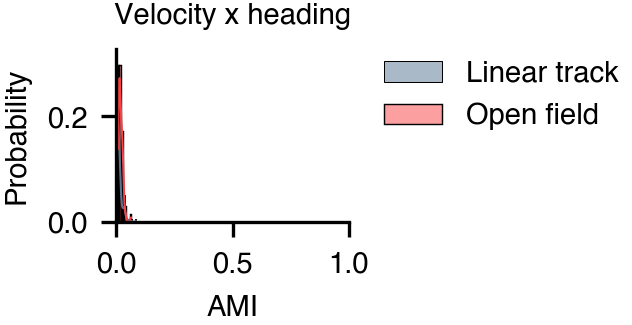

In [103]:
plt.figure(figsize=(1,.75))
sns.histplot(x=LT_covariates_data[:,3,4],kde=True,
             label='Linear track',
             stat='probability',
             color='C0'
             )
sns.histplot(x=OF_covariates_data[:,3,4],kde=True,
             label='Open field',
             stat='probability',
             color='C6')

plt.title('Velocity x heading')
plt.xlabel('AMI')
plt.xlim([0,1])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(params['path_to_results']+'/figures'+'/covariance_velocityVSheading.pdf')

In [3]:
data_list=[]
for i in range(LT_covariates_data.shape[0]):
    for x in range(LT_covariates_data.shape[1]):
        for y in range(LT_covariates_data.shape[2]):
            if y>x:
                data_list.append({
                    'AMI':LT_covariates_data[i,x,y],
                    'var1': labels[x],
                    'var2': labels[y],
                    'task': 'Linear track'
                })

for i in range(OF_covariates_data.shape[0]):
    for x in range(OF_covariates_data.shape[1]):
        for y in range(OF_covariates_data.shape[2]):
            if y>x:
                data_list.append({
                    'AMI':OF_covariates_data[i,x,y],
                    'var1': labels[x],
                    'var2': labels[y],
                    'task': 'Open field'
                })
df = pd.DataFrame(data_list)

In [14]:
df["Variable pair"] = df['var1'] +"-"+ df["var2"]

In [15]:
df

,AMI,var1,var2,task,Variable pair
0,0.107319,space,time,Linear track,space-time
1,0.091245,space,distance,Linear track,space-distance
2,0.098522,space,speed,Linear track,space-speed
3,0.002340,space,heading,Linear track,space-heading
4,0.322089,time,distance,Linear track,time-distance
...,...,...,...,...,...
2205,0.071512,time,speed,Open field,time-speed
2206,0.027381,time,heading,Open field,time-heading
2207,0.060781,distance,speed,Open field,distance-speed
2208,0.015014,distance,heading,Open field,distance-heading


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


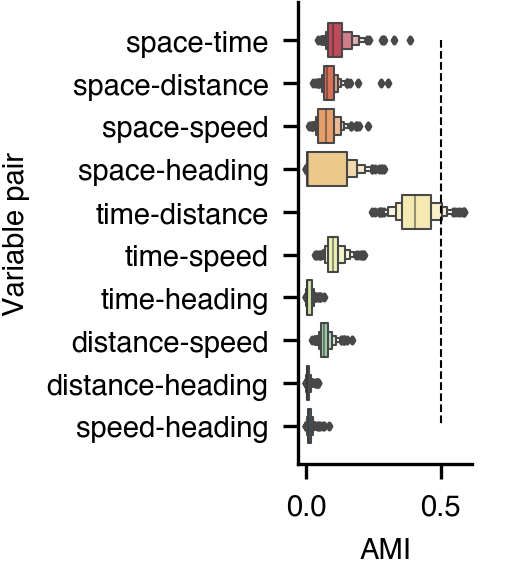

In [52]:
plt.figure(figsize=(.75,2))
sns.boxenplot(data=df,
            y='Variable pair',
            x='AMI',
            #hue='task',
            palette='Spectral',
         #   capsize=.4
            )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.plot([.5,.5],[0,9],'k--')
plt.savefig(params['path_to_results']+'/figures'+'/boxen_covariance_summary.pdf')